<a href="https://colab.research.google.com/github/Razzf/NeuralNetworkFromScratch/blob/master/NeuralNetworkFscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.utilities.lambdify import lambdify, implemented_function


from sklearn.datasets import make_circles

In [209]:
n = 500
p = 2

X, y = make_circles(n_samples=n, factor=0.5, noise=0.06)

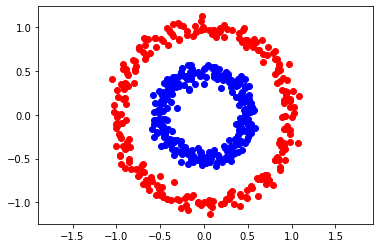

In [210]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue')

plt.axis('equal')
plt.show()

In [211]:
class Dense():
  def __init__(self, n_inputs, n_neurons, activation):

    self.act = activation
    self.biases = np.random.rand(1, n_neurons) * 2 - 1
    self.weights = np.random.rand(n_inputs, n_neurons) * 2 -1

In [212]:
class Funky():
  def __init__(self, function, vars):
    args = sp.symbols(vars)
    self.func = lambdify(args, function)
    derivative = sp.diff(function, args)
    self.prime = lambdify(args, derivative)

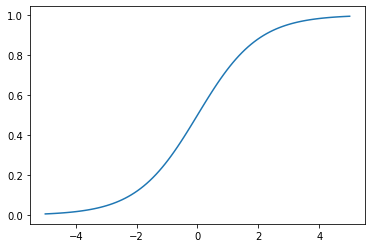

In [213]:
sig_expression = 1 / (1 + sp.exp(-x))
sigmoid = Funky(sig_expression, 'x')

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigmoid.func(_x))
plt.show()


In [214]:
def create_nn(topology, act_f):

  nn = []

  for il, layer in enumerate(topology[:-1]):
    nn.append(Dense(topology[il], topology[il + 1], act_f))
  return nn


In [215]:
topology = [p, 8, 4, 1]

network = create_nn(topology, sigmoid)

mse = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
       lambda Yp, Yr: (Yp - Yr))

def train(nn, x, y, loss_f, lr=0.5):

  out = [(None), X]
  for i in range(len(nn)):
    z = np.dot(out[-1][1], nn[i].weights) + nn[i].biases
    a = nn[i].act.func(z)
    out.append((z, a))
  print(out[-1][1])

train(network, X, y, mse)

[[0.47489025]]
